In [1]:
import argparse
import os
import pandas as pd
import h5py
import numpy as np
import sys
import json
from os import environ as cuda_environment
import multiprocessing
import BM_CR_funcs as BMf

In [4]:
inputfolder = '/Users/ellenvanmaren/Desktop/Insel/EL_experiment/Codes/Cluster_scripts/Data/BM_CR'
output_folder = os.path.join(inputfolder, "NMF_output")
files_to_process = [
        filename
        for filename in os.listdir(inputfolder)
        if filename.endswith(".csv") and filename.startswith("EL")
    ]

In [40]:
#1. Load data
filename = files_to_process[0]

con_trial = pd.read_csv(os.path.join(output_folder, filename.replace(".csv", "_cluster.csv")))

filename_h5 = filename.replace(".csv", "_nmf.h5")
with h5py.File(os.path.join(output_folder,filename_h5), 'r') as hf:
        # Read W and H datasets
        W = hf['W'][:]
        H = hf['H'][:]
        
filename_json = filename.replace(".csv", "_nmf_cluster.json")
with open(os.path.join(output_folder, filename_json), 'r') as json_file:
    clusters = json.load(json_file)

In [41]:
con_trial = con_trial[(con_trial.SleepState!= 'NREM1')]
con_trial = con_trial.reset_index(drop=True)
## 1. Add unique connection label for each StimxChan combination: Con_ID
con_trial['Con_ID'] = con_trial.groupby(['Stim', 'Chan']).ngroup()
con_trial.insert(5,'Cluster', 0)

In [ ]:
# Add 'Cluster' column to the DataFrame based on the cluster assignments
for i, channels_in_cluster in clusters.items():
    con_trial.loc[np.isin(con_trial.Con_ID, channels_in_cluster), 'Cluster'] = i


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
con_trial

,Chan,Stim,LL,P2P,LL_onset,Cluster,LL_pre,LL_WOI,Sig,Hour,SleepState,Block,Sleep,Num,Num_block,Date,Artefact,d,Con_ID
0,0.0,38.0,3.112841,265.986196,2.343089,0,1.877114,2.312714,1,15.0,Wake,1.0,0.0,0.0,0.0,20220215.0,0.0,35.68,1199
1,0.0,40.0,2.724212,240.247410,0.000000,0,1.947729,-1.000000,0,15.0,Wake,1.0,0.0,1.0,1.0,20220215.0,-1.0,35.35,1300
2,0.0,19.0,2.371869,242.534783,2.343071,4,1.199924,2.343071,1,15.0,Wake,1.0,0.0,2.0,2.0,20220215.0,0.0,14.23,698
3,0.0,68.0,1.501889,145.296012,0.000000,0,1.456643,1.294352,0,15.0,Wake,1.0,0.0,3.0,3.0,20220215.0,0.0,75.99,2095
4,0.0,27.0,1.853082,162.626234,0.000000,0,2.362543,-1.000000,0,15.0,Wake,1.0,0.0,4.0,4.0,20220215.0,0.0,23.61,947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510189,86.0,75.0,6.057895,737.278650,5.988463,0,3.690086,6.057895,1,13.0,Wake,69.0,0.0,10338.0,144.0,20220218.0,0.0,38.50,2345
510190,86.0,47.0,5.375446,283.214409,0.000000,0,4.760937,-1.000000,0,13.0,Wake,69.0,0.0,10340.0,146.0,20220218.0,-1.0,65.21,1549
510191,86.0,49.0,3.795502,221.487138,2.978491,0,3.186474,-1.000000,0,13.0,Wake,69.0,0.0,10341.0,147.0,20220218.0,0.0,67.77,1647
510192,86.0,27.0,2.703691,98.190826,0.000000,0,-1.000000,-1.000000,0,13.0,Wake,69.0,0.0,10342.0,148.0,20220218.0,1.0,66.56,997


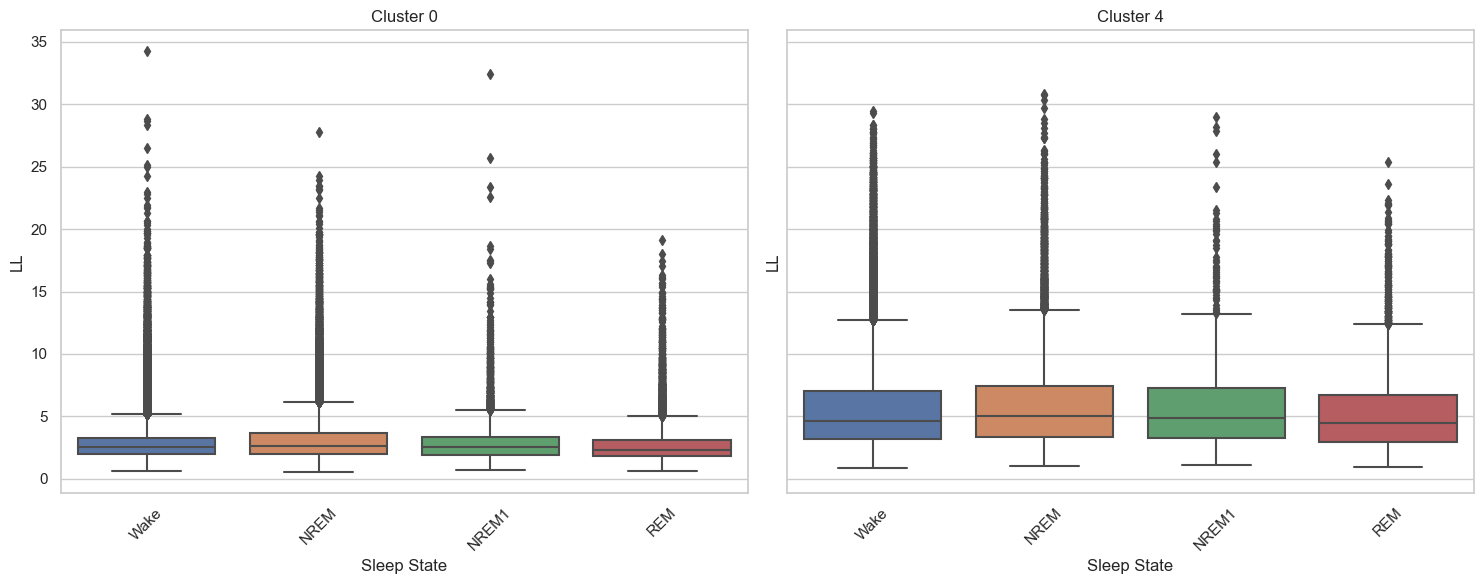

In [53]:
# Set up the plotting style
sns.set(style="whitegrid")

# Get unique cluster indices
unique_clusters = con_trial['Cluster'].unique()

# Create a figure and subplots
num_clusters = len(unique_clusters)
fig, axes = plt.subplots(1, num_clusters, figsize=(15, 6), sharey=True)

# Loop through each unique cluster to create boxplot
for i, cluster_idx in enumerate(unique_clusters):
    cluster_data = con_trial[con_trial['Cluster'] == cluster_idx]
    
    ax = sns.boxplot(x='SleepState', y='LL_norm', data=cluster_data, ax=axes[i])
    ax.set_title(f'Cluster {cluster_idx}')
    ax.set_xlabel('Sleep State')
    ax.set_ylabel('LL')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()